In [1]:
%pylab inline
import matplotlib.pyplot as plt
from word2vec import Corpus, SkipGram

Populating the interactive namespace from numpy and matplotlib


In [2]:
corpus = Corpus('data/', vocab_size=8000, corpus_file='corpus')

In [3]:
vector_size = 200
context_window_size = 5
epochs = 40
learning_rate = 0.05
batch_size = 50
trainer = SkipGram(vector_size, corpus)

In [4]:
trainer.load('skip_gram.npy')

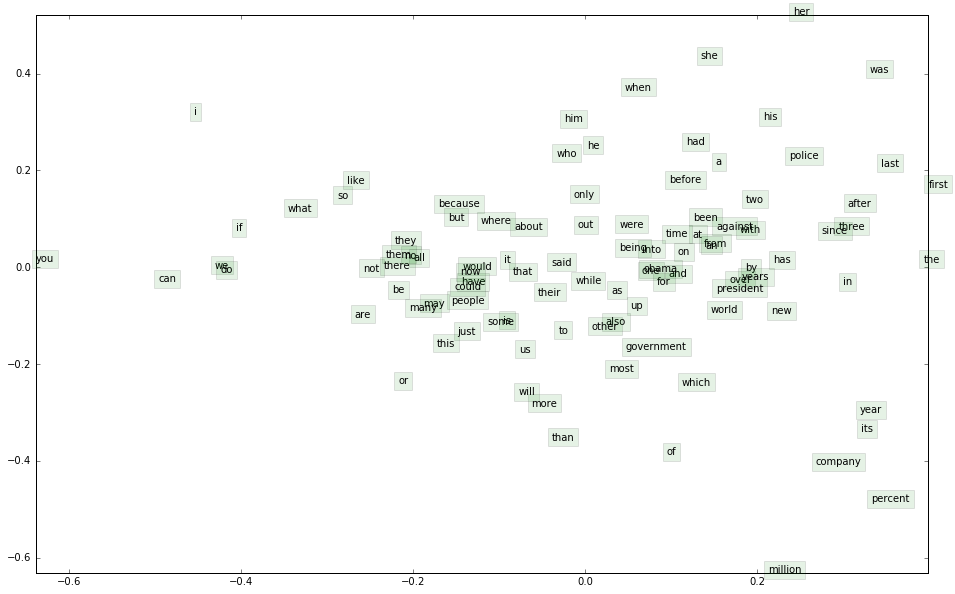

In [5]:
import numpy as np
from operator import itemgetter
# Taken from here https://github.com/mhjabreel/word2vec_theano/blob/master/w2v.ipynb
word_vectors = trainer.W_in.eval()
top_words = sorted(corpus.word_freq.items(), key=itemgetter(1), reverse=True)[:100]

visualize_words = zip(*top_words)[0]
    
visualize_idx = [corpus.word_to_idx[word] for word in visualize_words]
visualize_vecs = word_vectors[visualize_idx, :]
temp = (visualize_vecs - np.mean(visualize_vecs, axis=0))
covariance = 1.0 / len(visualize_idx) * temp.T.dot(temp)
U, S, V = np.linalg.svd(covariance)
coord = temp.dot(U[:,0:2]) 

fig = plt.figure()
fig.set_size_inches((16, 10))
for i in xrange(len(visualize_words)):
    plt.text(coord[i,0], coord[i,1], visualize_words[i], bbox=dict(facecolor='green', alpha=0.1))
    
plt.xlim((np.min(coord[:,0]), np.max(coord[:,0])))
plt.ylim((np.min(coord[:,1]), np.max(coord[:,1])))
plt.show()

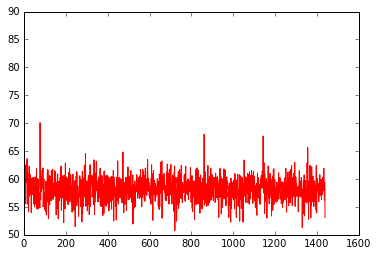

In [6]:
import cPickle as pickle
with open('skip_gram_losses.npy', 'r') as f:
    loss_changes = pickle.load(f)[::100]

t = list(range(len(loss_changes)))

plt.plot(t, loss_changes, 'r')
plt.show()

In [7]:
def export_embeddings(corpus, word_vectors, file_name):
    with open(file_name, 'w+') as f:
        for word, idx in corpus.word_to_idx.items():
            print >>f, word, ' '.join(map(str, word_vectors[idx]))

In [8]:
def export_dict(corpus, file_name):
    with open(file_name, 'w+') as f:
        for word, freq in corpus.word_freq.items():
            print >>f, word, freq

In [9]:
export_embeddings(corpus, word_vectors, 'skip_gram_embeddings.txt')
export_dict(corpus, 'skip_gram_dict.txt')

In [10]:
%%bash
python evaluation/GloVe/eval/python/evaluate.py --vocab_file skip_gram_dict.txt --vectors_file skip_gram_embeddings.txt
python evaluation/eval-word-vectors/all_wordsim.py skip_gram_embeddings.txt evaluation/eval-word-vectors/data/word-sim/

capital-common-countries.txt:
ACCURACY TOP1: 1.43% (3/210)
capital-world.txt:
ACCURACY TOP1: 1.73% (3/173)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt:
ACCURACY TOP1: 0.00% (0/532)
family.txt:
ACCURACY TOP1: 1.10% (2/182)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 0.00% (0/342)
gram2-opposite.txt:
ACCURACY TOP1: 0.00% (0/56)
gram3-comparative.txt:
ACCURACY TOP1: 0.00% (0/552)
gram4-superlative.txt:
ACCURACY TOP1: 0.00% (0/132)
gram5-present-participle.txt:
ACCURACY TOP1: 0.00% (0/506)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 0.00% (0/684)
gram7-past-tense.txt:
ACCURACY TOP1: 0.00% (0/930)
gram8-plural.txt:
ACCURACY TOP1: 0.00% (0/506)
gram9-plural-verbs.txt:
ACCURACY TOP1: 0.00% (0/240)
Questions seen/total: 25.96% (5073/19544)
Semantic accuracy: 0.71%  (8/1125)
Syntactic accuracy: 0.00%  (0/3948)
Total accuracy: 0.16%  (8/5073)
Serial              Dataset       Num Pairs       Not found             Rho
     1    EN-SIMLEX-999.txt             999             3

Vectors read from: skip_gram_embeddings.txt 
